# Decision Tree

## Import libraries

In [21]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
from sklearn.model_selection import train_test_split 

In [23]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir

## Set up

In [24]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [25]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_final.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_final.csv


In [26]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [27]:
df_wines.sample(10)

,PC1,PC2,PC5,PC6,PC7,quality_low,style
3782,0.380101,-0.112020,0.144268,-0.105678,0.144864,1,1
4325,0.162673,-0.030604,-0.002943,0.112729,-0.048615,0,1
3804,-0.155214,-0.242864,0.168191,-0.054164,0.153421,0,1
3760,-0.225099,-0.013189,0.162009,-0.073861,-0.104317,0,1
2070,0.831282,-0.044254,0.093487,0.018468,0.122802,0,1
1784,0.546509,-0.425040,0.114502,-0.297024,0.197052,0,1
1174,0.090392,0.314023,-0.082049,-0.224422,0.293367,1,1
2207,-0.144861,-0.163584,-0.047915,-0.194938,-0.060827,0,1
4540,0.034500,-0.037355,0.053195,-0.288591,0.222448,1,1
4396,-0.113616,-0.129808,0.092346,0.246808,0.337262,0,1


# Preparamos los datos

In [28]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_low"])
y = df_wines.quality_low #Defino el Target

In [29]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [30]:
X_train.shape, X_test.shape

((3509, 6), (1504, 6))

# Decision  tree

In [46]:
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creamos el modelo

In [47]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [48]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [49]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7244229125106868
% de aciertos sobre el set de evaluación: 0.7014627659574468


## Importancia de las variables

c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


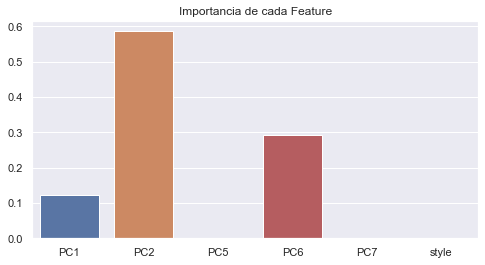

In [50]:
plt.figure(figsize=(8,4))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

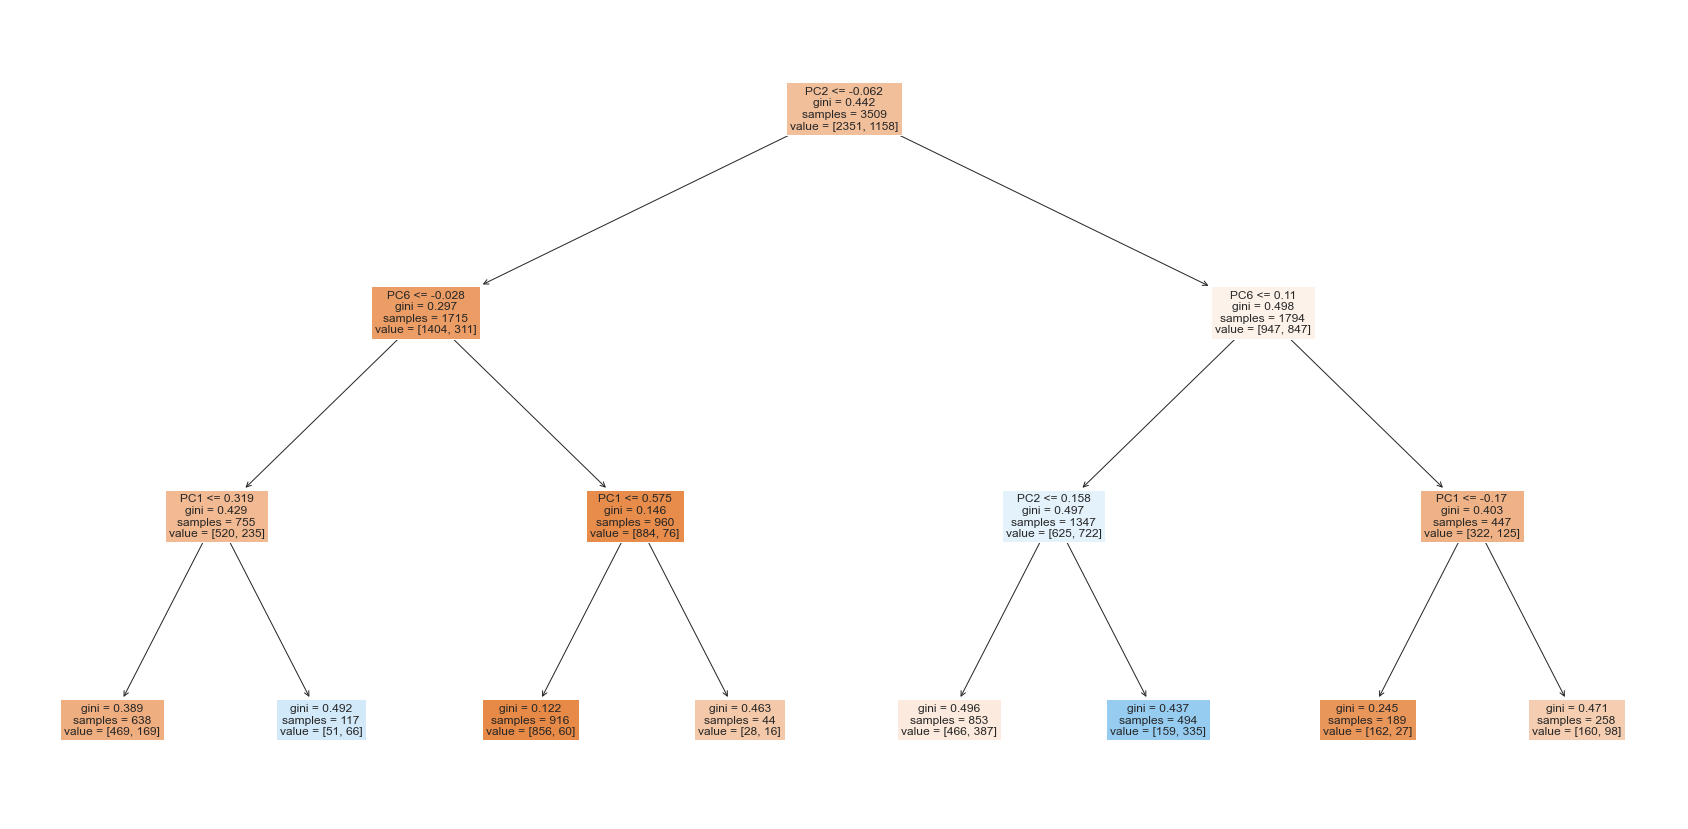

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(decision_tree = tree, feature_names=X.columns, filled = True, fontsize=12);